## Logistic Regression

Logistic regression is essentially the duct take of Data Science, handy in many places.   To use Logistic Regression, you need to have binary  (0/1) outcome suitable for a classication task.  Although there are extensions of the method that apply to multi class classification.  It's very typical to create a logistic regression reference model before trying more complex methods 

#### Model
Logistic Regression solves the model p(X)=e^(β0+β1x)/( 1+ e^(β0+β1X) where βs are coefficents and p(x) is the probablity of the outcome

+ β0 is the intercept
+ β1 is a coefficient that an be intepriateued as the natural log of the increase off odds of the seeing the outcome for every increase of x by 1

#### Requirments

+ 0/1 Binary Distrobution Outcome 
+ Not Outliers or extreme values on X side of equation
+ No Inter strong correlations between variables on the x side of the equation
    + Method will still work, but coefficients won't interpriptation will be suspect
+ Linear relationshiop between thre predictor variables (x side of the equation) and the logit of the outcome.

###### The Logit Fuctnion
p is the probablity of the outcome
logit(p) = log(p/(1-p))


#### Advantages:

+ Interpritable Model
+ returns coefficients that explain how exactly the model works
+ row level feature contributions are calculable 
+ p-values (depending on method used) help determine significance of effects
+ can return confidence intervals (depending on method)

##### Disadvantages

+ not typically very powerfull comparied to more complex methods
+ Ca Over fit if may variables are used
+ Coefficients can be missleading if there are lurking or confounding variables




#### Data Collection
+ request package is use here to copy the file onto your local machine
+ os.system is used to send the command to unzip the file

#### Basics of How Logistif Regression Works 


In [50]:
# To Get P values, the stats model API is used here

import statsmodels.api as sm
from scipy import stats
import numpy as np
import pandas as pd

# labels have a probablity of 0.5
y = [1, 1, 1, 1 , 0, 0 , 0, 0]

# when x = 1 prob of label .75, ie   p(y|x=1) = .75, so odds as 3/1
# when x = 0 prob of label is .25 p(y|x=0) = .25 so odds are 1/4
X= pd.DataFrame({'x':[1, 1, 1, 0,  1, 0, 0, 0]})

model = sm.Logit(endog=y, exog=X)
results = model.fit(method='bfgs', maxiter=100)

print(results.summary())

b1 = np.exp(results.params[0])

print('b1:', b1 )

# Find the new Pobablity of y, when x = 1 

print('new prob of y : b1 * 1/4 = {}'.format(b1* 1/4))




Optimization terminated successfully.
         Current function value: 0.627741
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                    8
Model:                          Logit   Df Residuals:                        7
Method:                           MLE   Df Model:                            0
Date:                Sun, 06 Oct 2019   Pseudo R-squ.:                 0.09436
Time:                        16:14:26   Log-Likelihood:                -5.0219
converged:                       True   LL-Null:                       -5.5452
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x              1.0986      1.155      0.9

#### Pvalues
Here the pvalue represents the probabliy of a mean from randomly resampling a normal distobution with a that is more standard deviations away the mean we have tested against. 
+ generally pvalues < .05 are considered signficant


### Use Case, Finding Most Postive and Negative Words in Movie Reviews
Using the cornell moview review data sets, and logicist regression we can find the most postive and negative words associated with the reviews.. 
##### The Data

+ 1000 postive and 1000 negative movie reviews stored, each review in a it's own text file

#### Preprocssing 
+ Sklearn preprocessing is accomplished using CountVectorizer, using a bag of words of approach. This happens in two steps:
    + 1) learn a dictionary
    + 2) one hot encode words from dictionary, result is a numeric array of 1s and 0s
    

In [52]:
import os
import requests 
import numpy as np
from pathlib import Path

# Download Cornal Moview revirew data sets
url = 'http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz'
file_path = 'polarity.tar.gz'
path = Path(file_path)
response = requests.get(url)

# write contents of the download 
path.write_bytes(response.content)

# unziped the file create a directory called txt_sentoken
os.system('tar -xzf {}'.format(file_path))

# Note if you don't have tar, you may need to use 7zip or another unzipping tool (windows)

0

#### Data Loading
+ file paths for positive and negative reviews are collected into lists
+ a generator is create to load text from each file
+ an array of 1s and 0s  (positive and negative reviews) is created
+ results
    + data: list of strings (text reviews)
    + labels: array of 0/1s

In [53]:
# set positive and negative directory paths
pos_dir = 'txt_sentoken/pos'
neg_dir = 'txt_sentoken/neg'

# define a function to read in text
def read_file_list(file_list):
    for file in file_list:
        with open(file, 'r') as f:
            text = f.readlines()
            text = ' '.join(text)
            yield text
            
# get the list of file paths
pos_files = os.listdir(pos_dir)
neg_files = os.listdir(neg_dir)


# data the working dir to the file paths
pos_files = [pos_dir + '/' + f for f in pos_files if 'cv' in f]
neg_files = [neg_dir + '/' + f for f in neg_files if 'cv' in f]
neg_reviews = list(read_file_list(neg_files))
pos_reviews = list(read_file_list(pos_files))
data = pos_reviews + neg_reviews

# positive 1, negative review 5
labels = np.array([1] * len(pos_reviews) + [0] * len(neg_reviews))

#
print(data[1][:200])
print('label:', labels[1])

upon arriving at the theater during the opening credits , i took my seat and prepared myself for what appeared to be " hellraiser meets the crow " . 
 but as soon as kiefer sutherland began speaking t
label: 1



#### Data Cleaning with CountVectorizor

+ min_df specifies in this case for a word to be in the vocabulary, it must show up in 10% of the reviews
+ stop_words is a list of words to remove from the vocabulary
+ binary = True means the ecoding is 0/1 present absent (if false the the encoding is the count of times the word token apeared

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

min_df = .1
stop_words = ['and', 'the', 'as', 'that']

cv = CountVectorizer(min_df=min_df,  stop_words=stop_words, binary=True)
# fits the count vect with a vocabuary 
cv = cv.fit(data )

features = cv.transform(data)

# prints out a list sample from the fitted vocabulary
cv.get_feature_names()[0:10]


['able',
 'about',
 'act',
 'acting',
 'action',
 'actor',
 'actors',
 'actually',
 'after',
 'again']

In [ ]:
#### Modeling with Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept = False)
mdl = model.fit(features, labels)
model.coef_


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ 2.96621629e-01,  1.84350535e-02,  1.16463034e-02,
        -1.80541405e-01, -5.89541530e-01,  2.26869138e-01,
         1.82784644e-01, -5.07899265e-01, -1.11602679e-01,
         1.49672102e-01,  1.03920051e-01,  1.41691518e-01,
        -1.57426979e-02,  2.52147656e-01,  3.56748939e-01,
         6.91312793e-01,  4.30704346e-01,  8.54746403e-02,
         6.62920886e-01, -3.26375210e-01,  1.69312234e-01,
        -2.76732327e-01, -1.57392530e-01, -2.11047035e-01,
        -8.18345309e-01, -4.89537862e-01,  3.78160279e-01,
         6.86633201e-03, -1.38436111e-01, -1.46369471e+00,
         4.70094456e-01, -4.23073053e-02,  4.63418288e-01,
         8.15453954e-01, -1.21466431e+00,  3.59887884e-01,
        -6.43268492e-01,  7.23741056e-01, -1.34150625e-01,
         1.84482841e-01, -4.99968397e-01,  4.28444961e-02,
         1.49423361e-01,  4.19947537e-01,  2.45491099e-01,
        -1.82422028e-01,  1.24142493e-01,  4.52884474e-01,
         5.53176067e-01, -2.63015739e-01,  5.39536370e-0

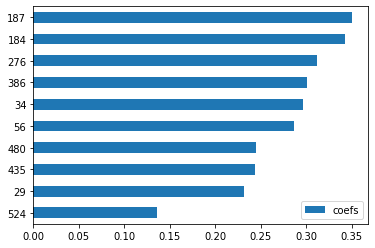

In [88]:
from matplotlib import pyplot as plt
coefs = np.exp(model.coef_).flatten()
coef_df = pd.DataFrame({'features': cv.get_feature_names(), 'coefs': coefs}).sort_values('coefs',ascending=True) 

coef_df.head(10).plot.barh()
plt.show()